This is a Heart Disease Data Set, collected from the UCI Machine Learning Repository. The complete collection consists of four individual databases collected from four different institutions located in Cleveland, Hungary, Switzerland, and the VA Long Beach.
Each database has the same instance format.  While the databases have 76 raw attributes, only 14 of them are actually used. Here are the descriptions of the columns for the dataset:

### Features:

**age:** age in years

**sex:** sex (1 = male; 0 = female)

**cp:** chest pain type

- 1 = typical angina
- 2 = atypical angina
- 3 = non-anginal pain
- 4 = asymptomatic

**trestbps:** resting blood pressure (in mm Hg on admission to the hospital)

**chol:**  serum cholestoral in mg/dl

**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg:**  resting electrocardiographic results

- 0 = normal
- 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach:** maximum heart rate achieved

**exang:** exercise induced angina (1 = yes; 0 = no)

**oldpeak:** ST depression induced by exercise relative to rest

**slope:** the slope of the peak exercise ST segment

- 1 = upsloping
- 2 = flat
- 3 = downsloping

**ca:** number of major vessels (0-3) colored by flourosopy

**thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect

### Target variable:

**hd:** heart disease

### Objectives:

Our goal is to apply machine learning algorithms. On this dataset using a Decision Tree algorithm to find out whether a patient has heart disease or not.

### Reference of this dataset: https://archive.ics.uci.edu/ml/datasets/heart+disease

### Import required libraries

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 350

from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve, roc_auc_score 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load the dataset
### Dealing with missing values

In [2]:
df = pd.read_csv('processed.cleveland.data', header = None,na_values = '?')
df = df.dropna()
display(df.head())
print(df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


(297, 14)


### Renaming the column names

In [3]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Check data types, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  hd        297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


### Separating the features and target variable

In [10]:
#features
X = df.drop('hd',axis= 1)
#X.head()

#target variable
df[df['hd'] > 1] = 1
#print(df['hd'].value_counts())
y = df[['hd']]
#y.head()

print(X.shape, y.shape)

(297, 13) (297, 1)


### One-Hot Encoding

In [11]:
X = pd.get_dummies(X, columns = ['cp', 'restecg', 'slope', 'thal'], drop_first = True)

display(X.head())
print(X.shape)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,1,0,0


(297, 19)


### Split the original dataset into the train set (80%) and the test set (20%)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.8, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 19) (60, 19) (237, 1) (60, 1)


### Create the model

In [13]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

### Plot the tree diagram of the Decision Tree

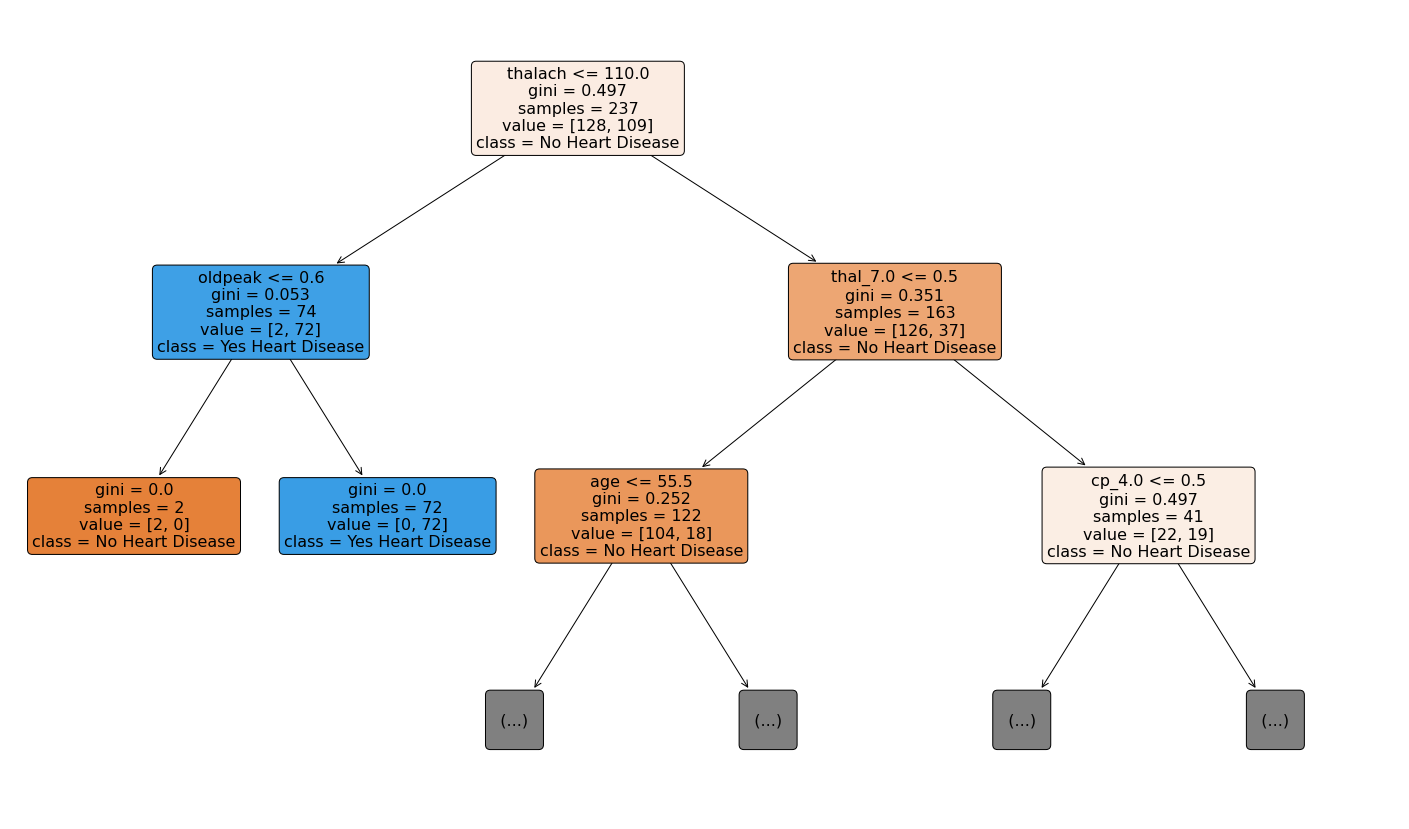

In [14]:
plt.figure(figsize = (25, 15))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["No Heart Disease", "Yes Heart Disease"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=16)

plt.show()

### Predict the target variable from the test dataset

In [15]:
y_pred = model_DT.predict(X_test)

### Model Performance Evaluation

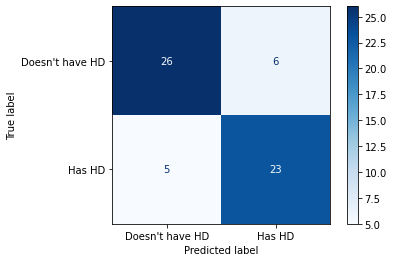

In [16]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=["Doesn't have HD", "Has HD"],
                      cmap='Blues')
plt.show()

In [17]:
class_report = classification_report(y_test, 
                                     y_pred)
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



### ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

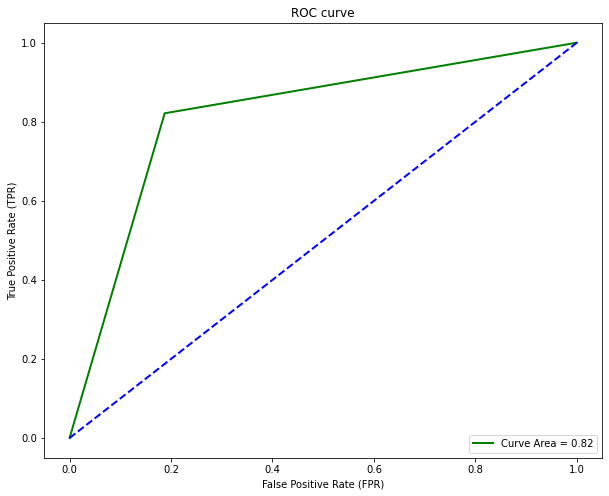

In [18]:
y_pred_proba = model_DT.predict_proba(X_test)[:,1]

fpr, tpr, thr = roc_curve(y_test, 
                          y_pred_proba)
auc = np.round(roc_auc_score(y_test, 
                             y_pred_proba), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()